In [1]:
import pandas as pd
from cleaning import clean
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kick = pd.read_csv('ks-projects-201801.csv')
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
kick=clean(kick)

## Business questions

### Which categories have the most successful number of projects and which categories have the most failed number of projects based on counts and percentage? 

The client is not interested in categories of projects which has less than 2500 counts as thgey want a wide range of data to base their decisions on.

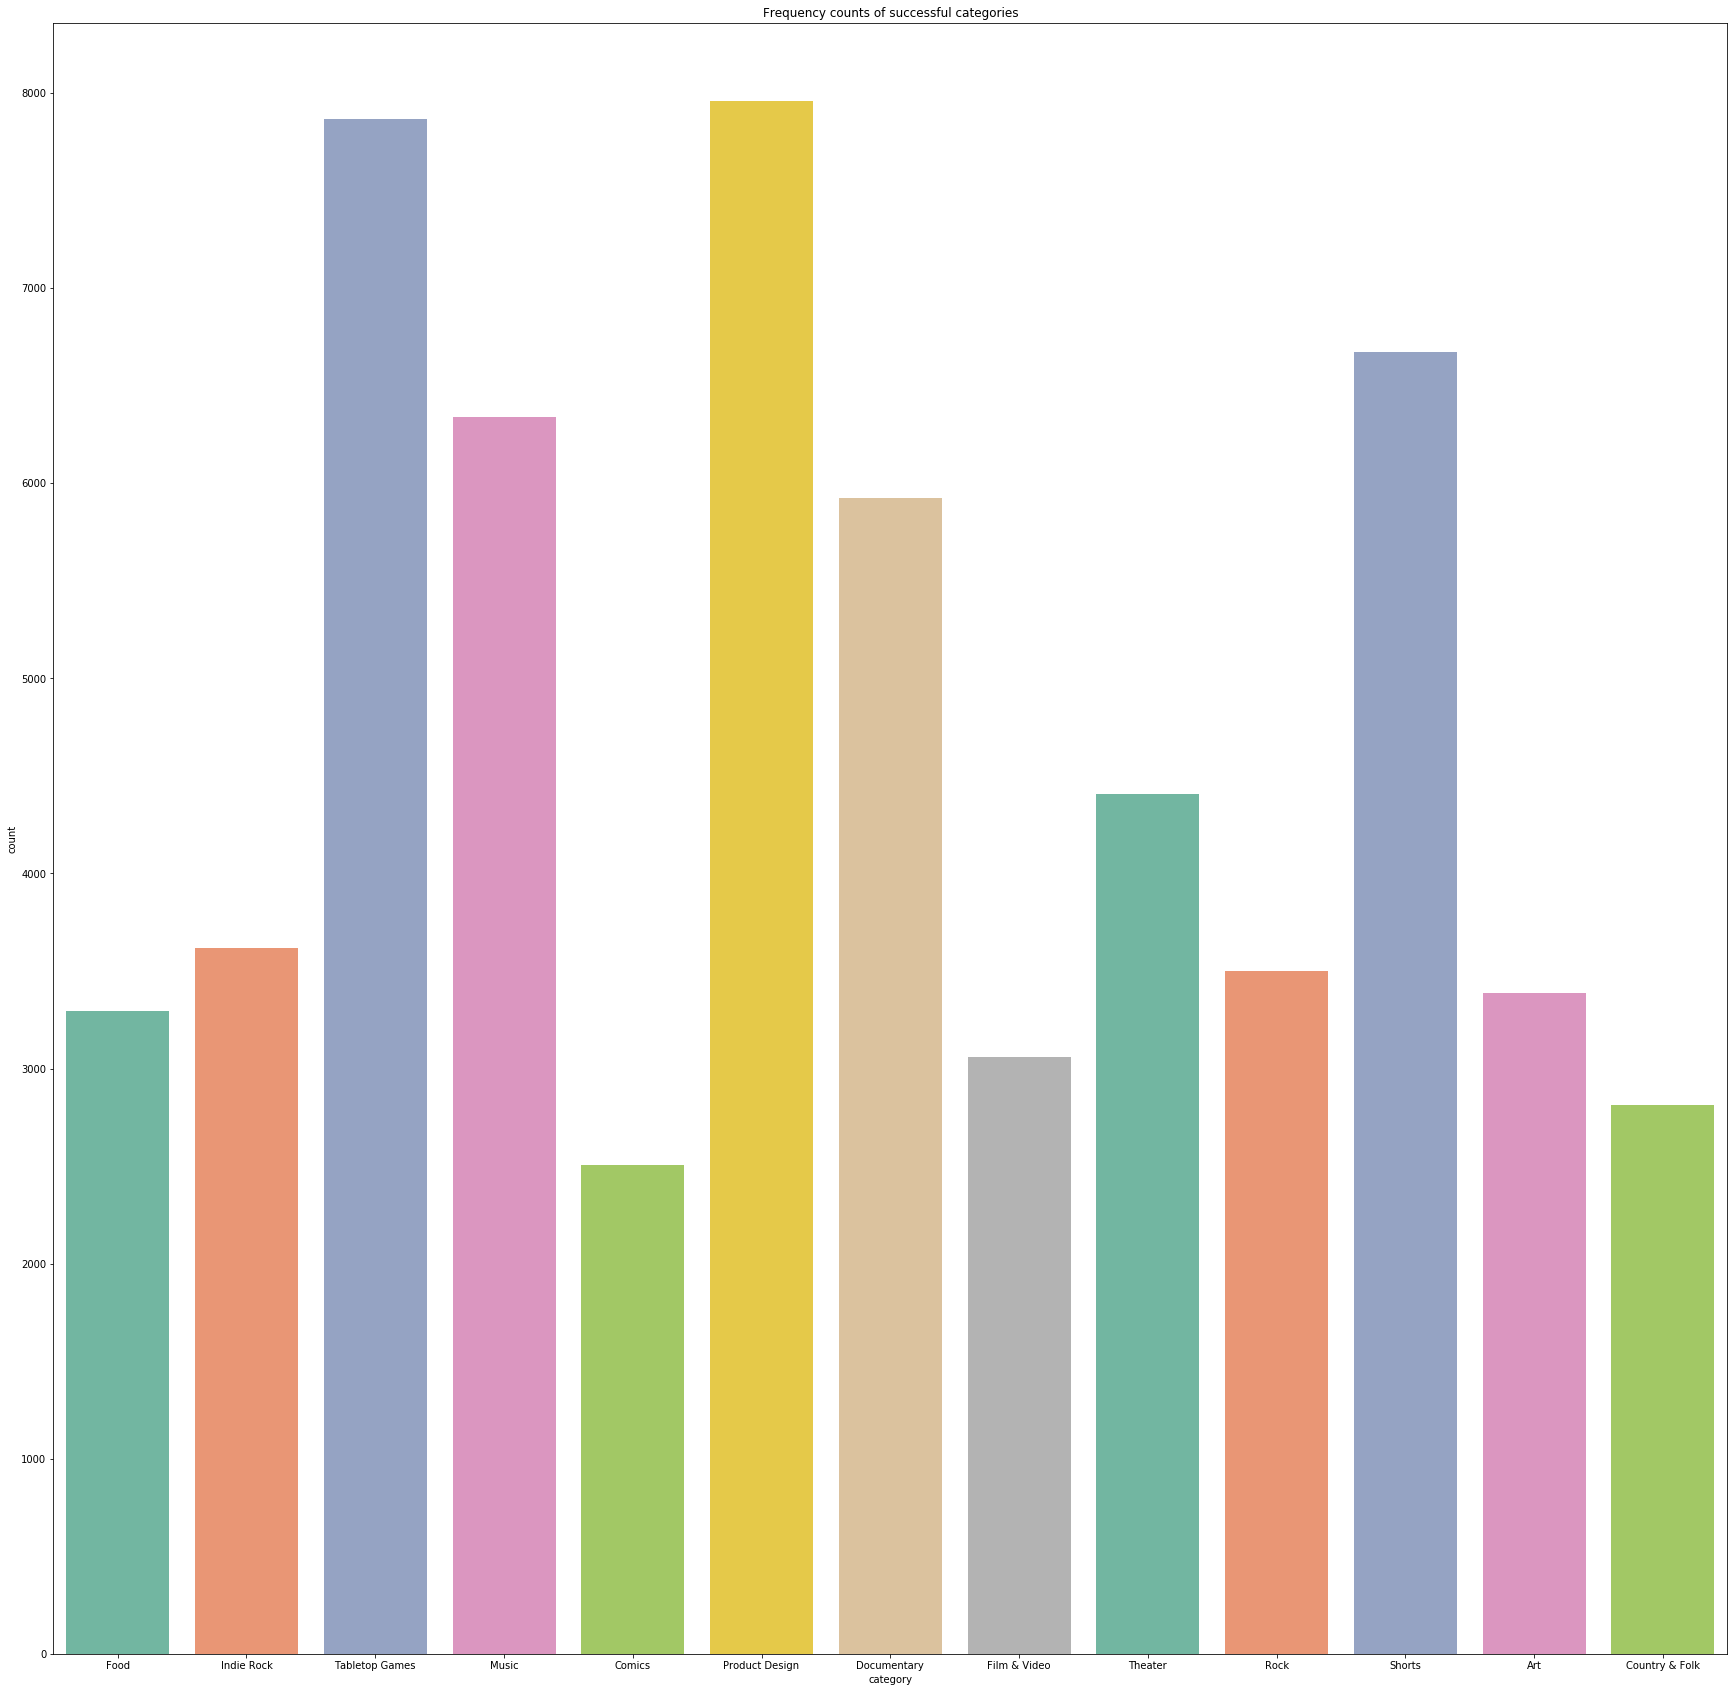

In [4]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='category', palette="Set2",data= kick[kick['state'] == 'successful'].groupby("category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('Frequency counts of successful categories');

According to the plot above, product deign has the highest number of successful projects, followed closely by table top games and then shorts in third.

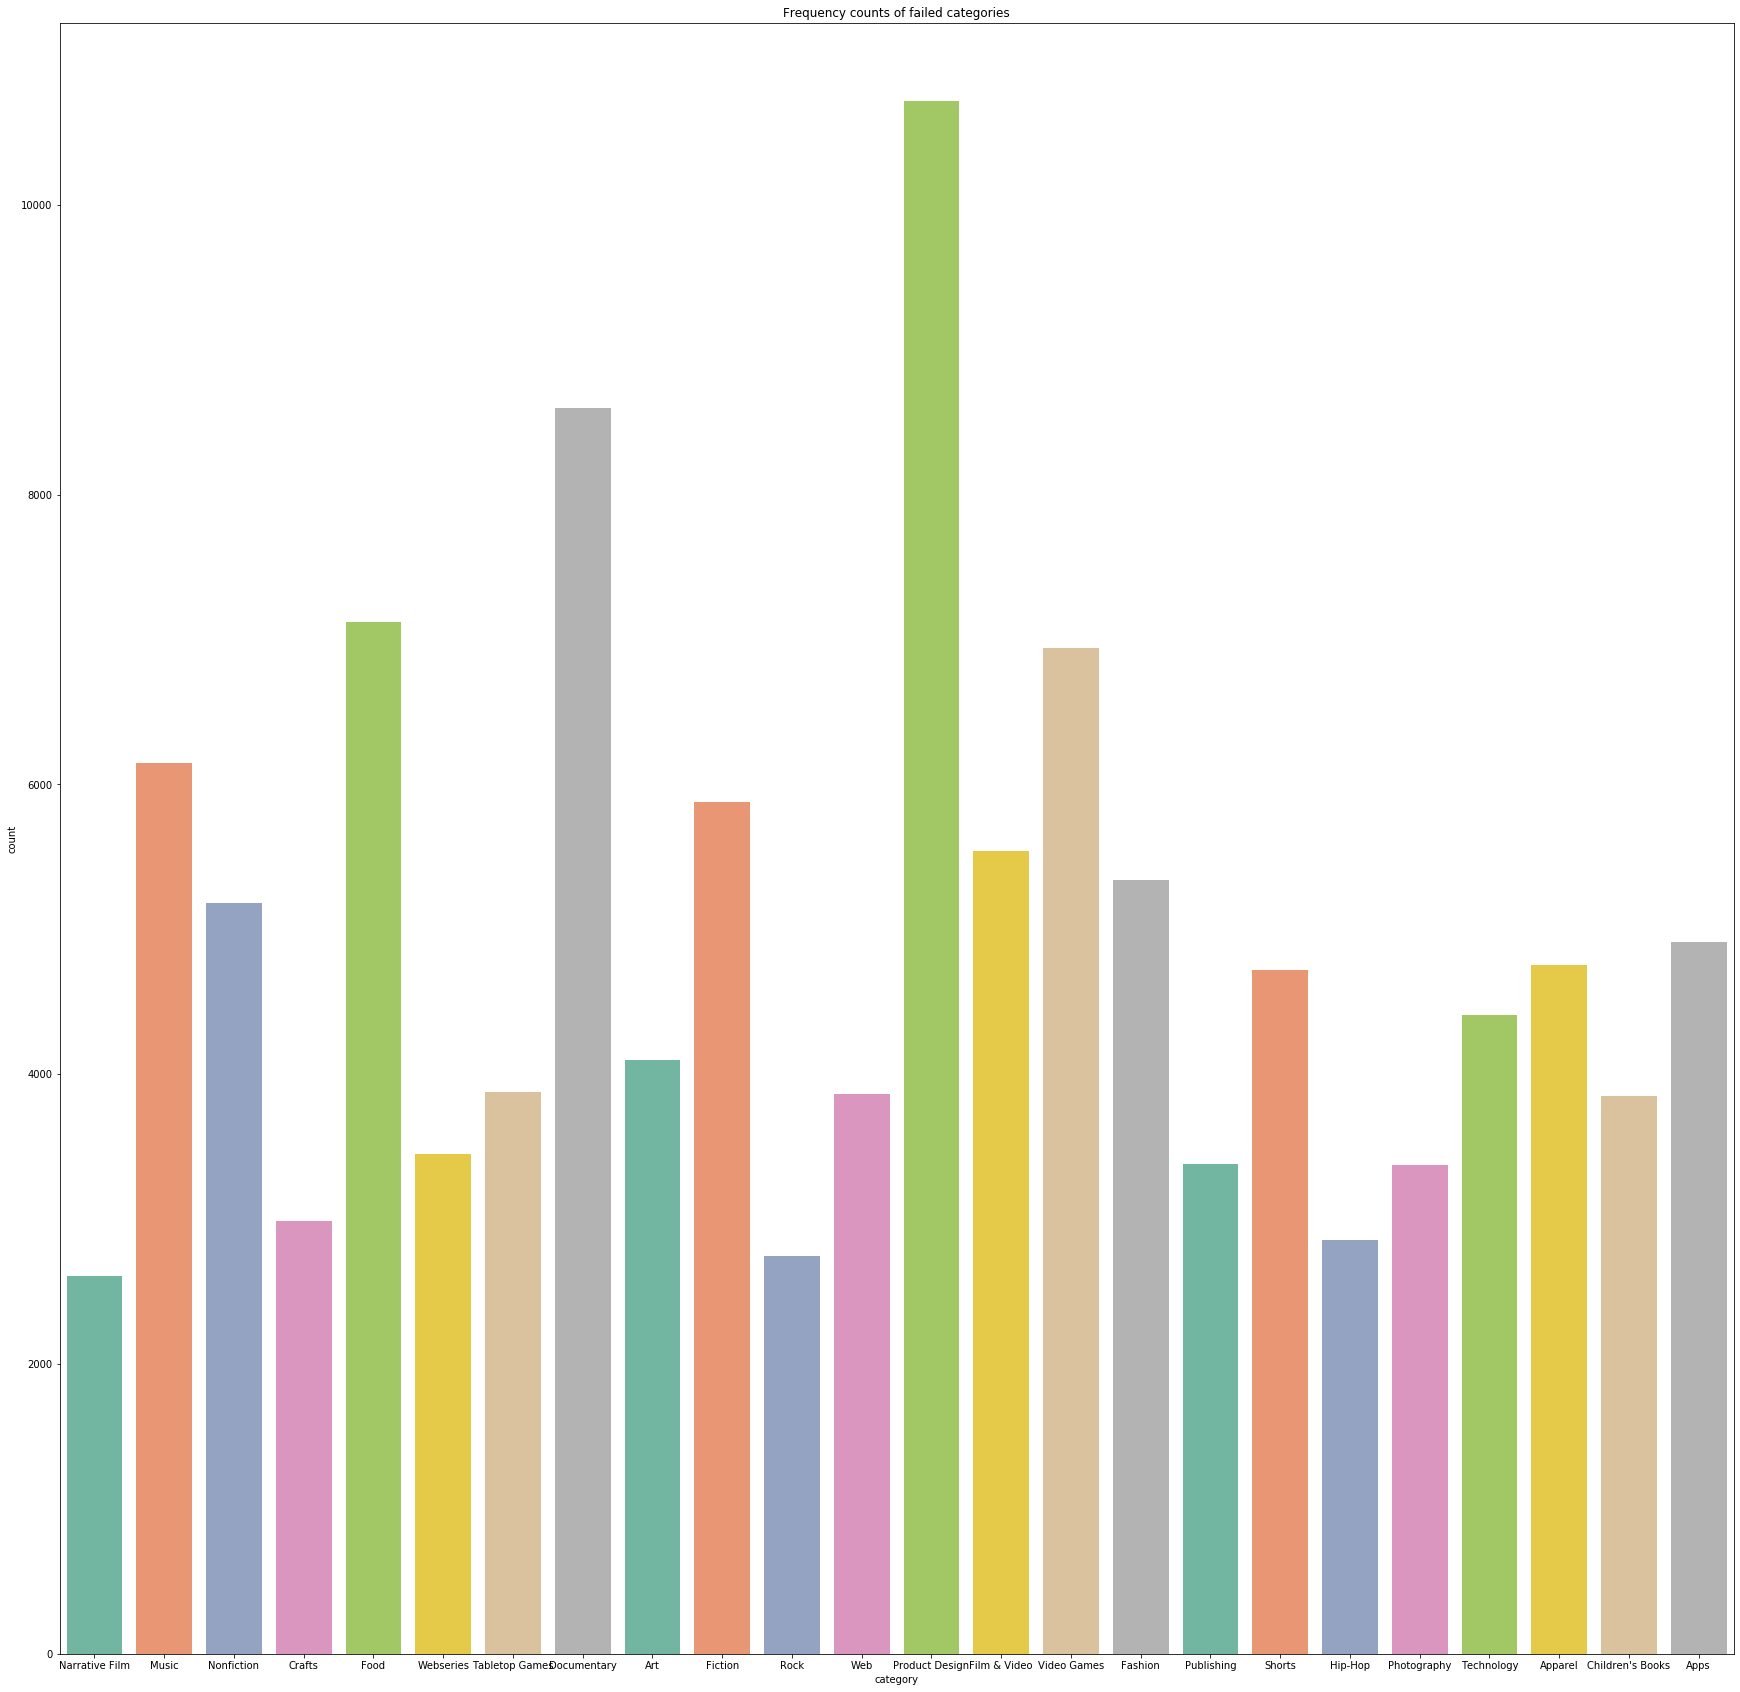

In [5]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='category', palette="Set2",data= kick[kick['state'] == 'failed'].groupby("category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('Frequency counts of failed categories');

The plot above shows that product design is also the category that has failed the most followed by documentary and food in second and third place.

Now that we know the counts of each category with regards to failure and success, what to calculate next is the percentage of success and failure divided by the outcomes of the whole projects.

In [6]:
counts = kick.category.value_counts()
succ = kick[kick.state == 'successful'].category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
most_success = frame.sort_values('Percent').tail(10)
least_success = frame.sort_values('Percent').head(10)

For the top 10 project most success rates and least success rates:

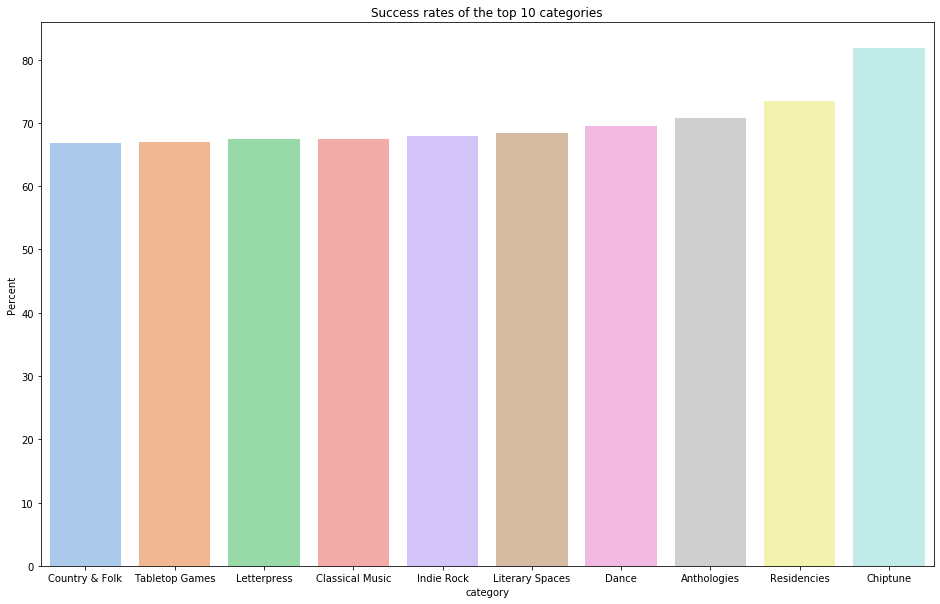

In [7]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='category',y = 'Percent', palette="pastel",data = most_success, ax=ax)
plt.title('Success rates of the top 10 categories');

Clearly from the plot above the most success rates for the category of a project is chiptunes follopwed by residencies.

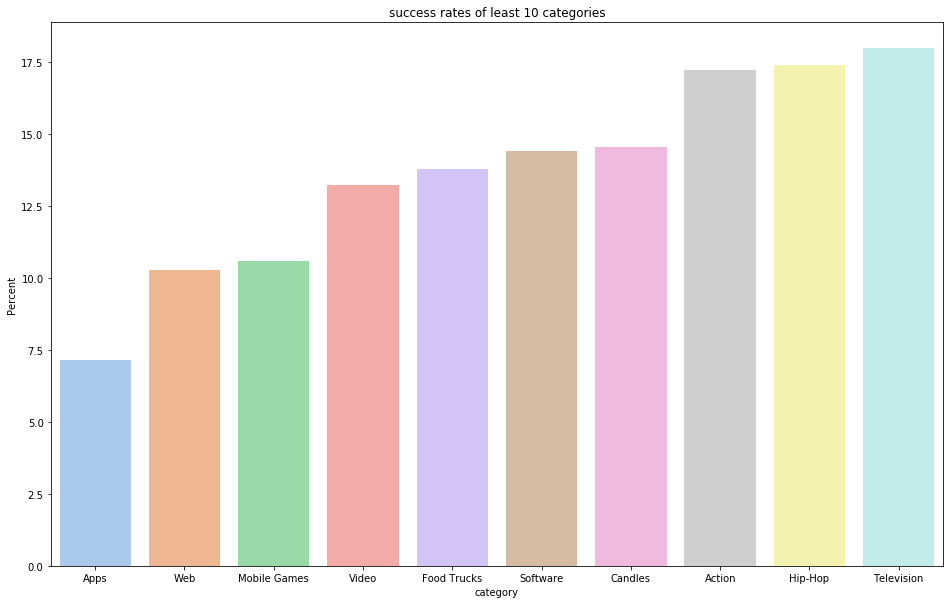

In [8]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='category',y = 'Percent', palette="pastel",data = least_success, ax=ax)
plt.title('success rates of least 10 categories');

As evident by the plot, apps, web and Mobile games are the least successful categories.

In [9]:
counts = kick.category.value_counts()
succ = kick[kick.state == 'failed'].category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
most_fail = frame.sort_values('Percent').tail(10)
least_fail = frame.sort_values('Percent').head(10)

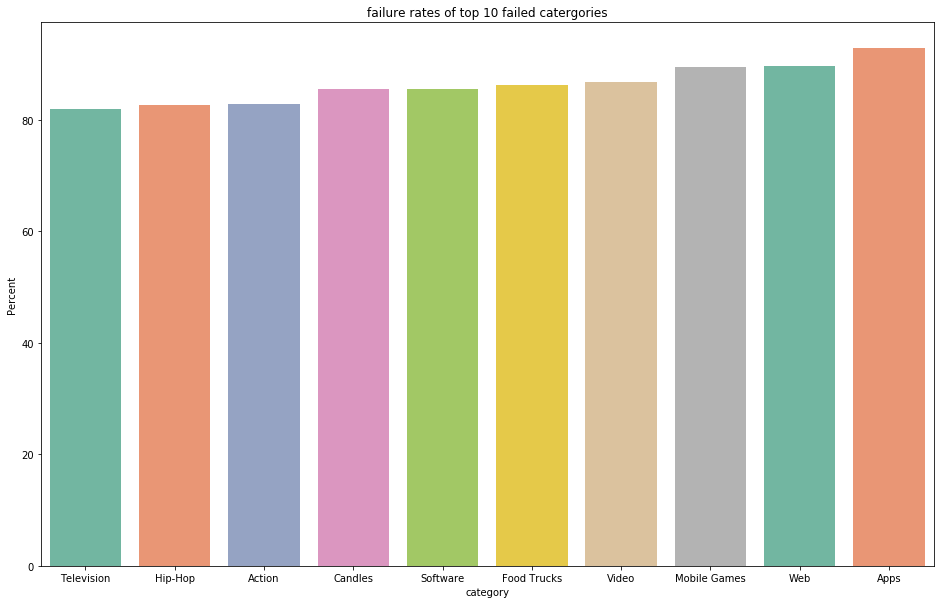

In [10]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='category',y = 'Percent', palette="Set2",data = most_fail, ax=ax)
plt.title('failure rates of top 10 failed catergories');

Just as we guessed in the previous plots, Apps, web and Mobile games are the categories that failed the most.

### Which main categories have the most successful and most failed number of projects based on the counts and success rates?

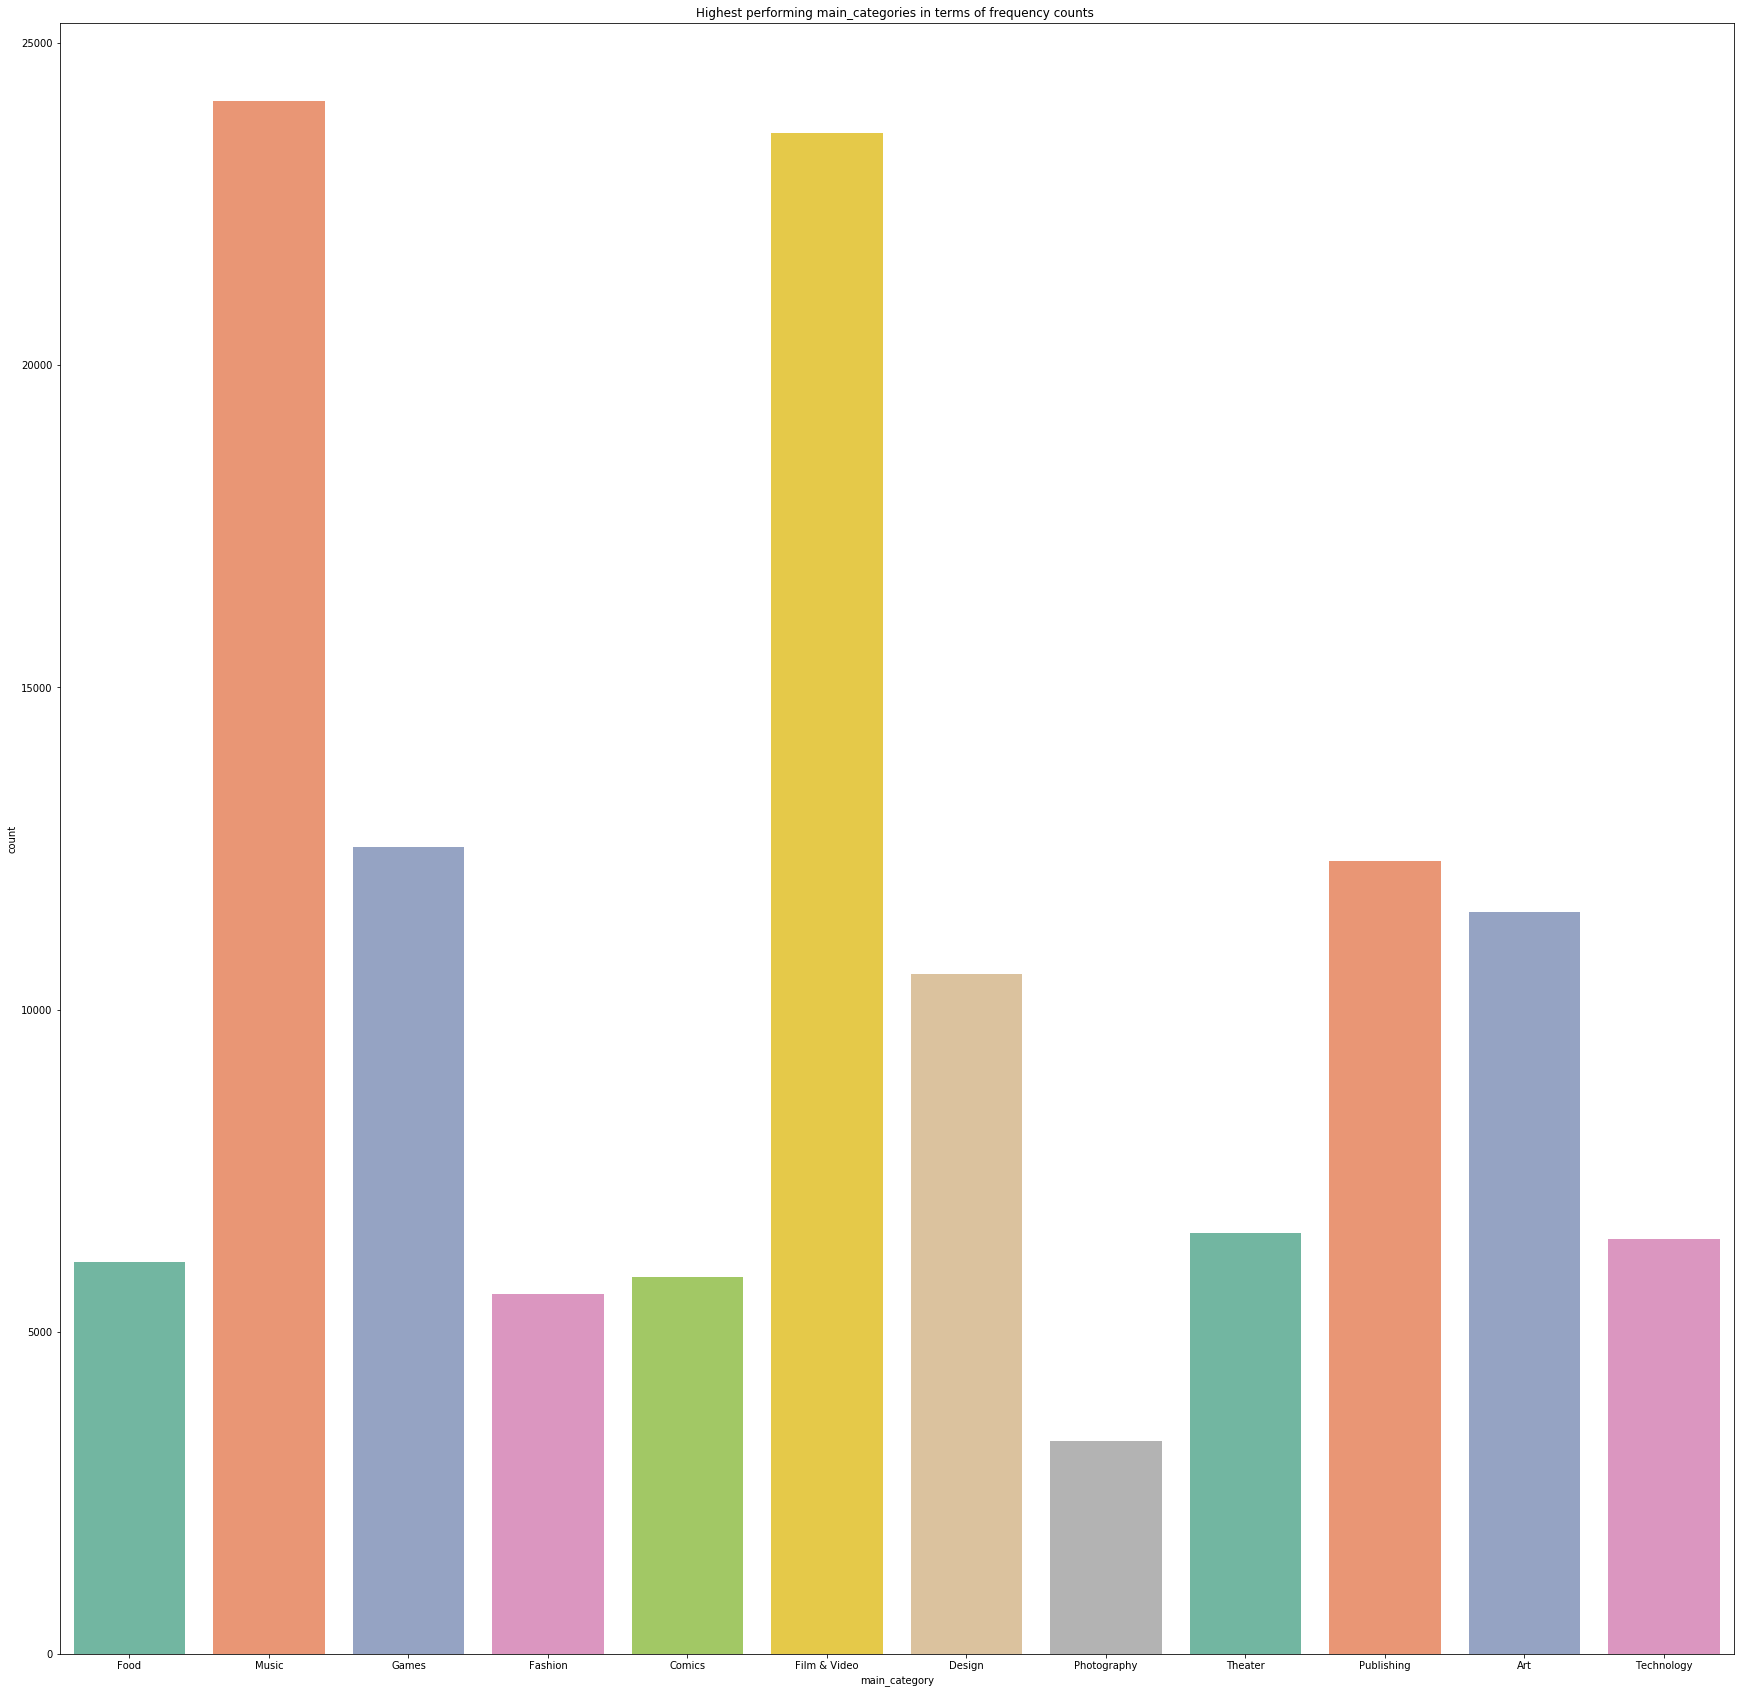

In [11]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='main_category', palette="Set2",data= kick[kick['state'] == 'successful'].groupby("main_category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('Highest performing main_categories in terms of frequency counts ');

As evident Music has the highest number of successful main_categories on Kickstarter followed by film&video, games and art.

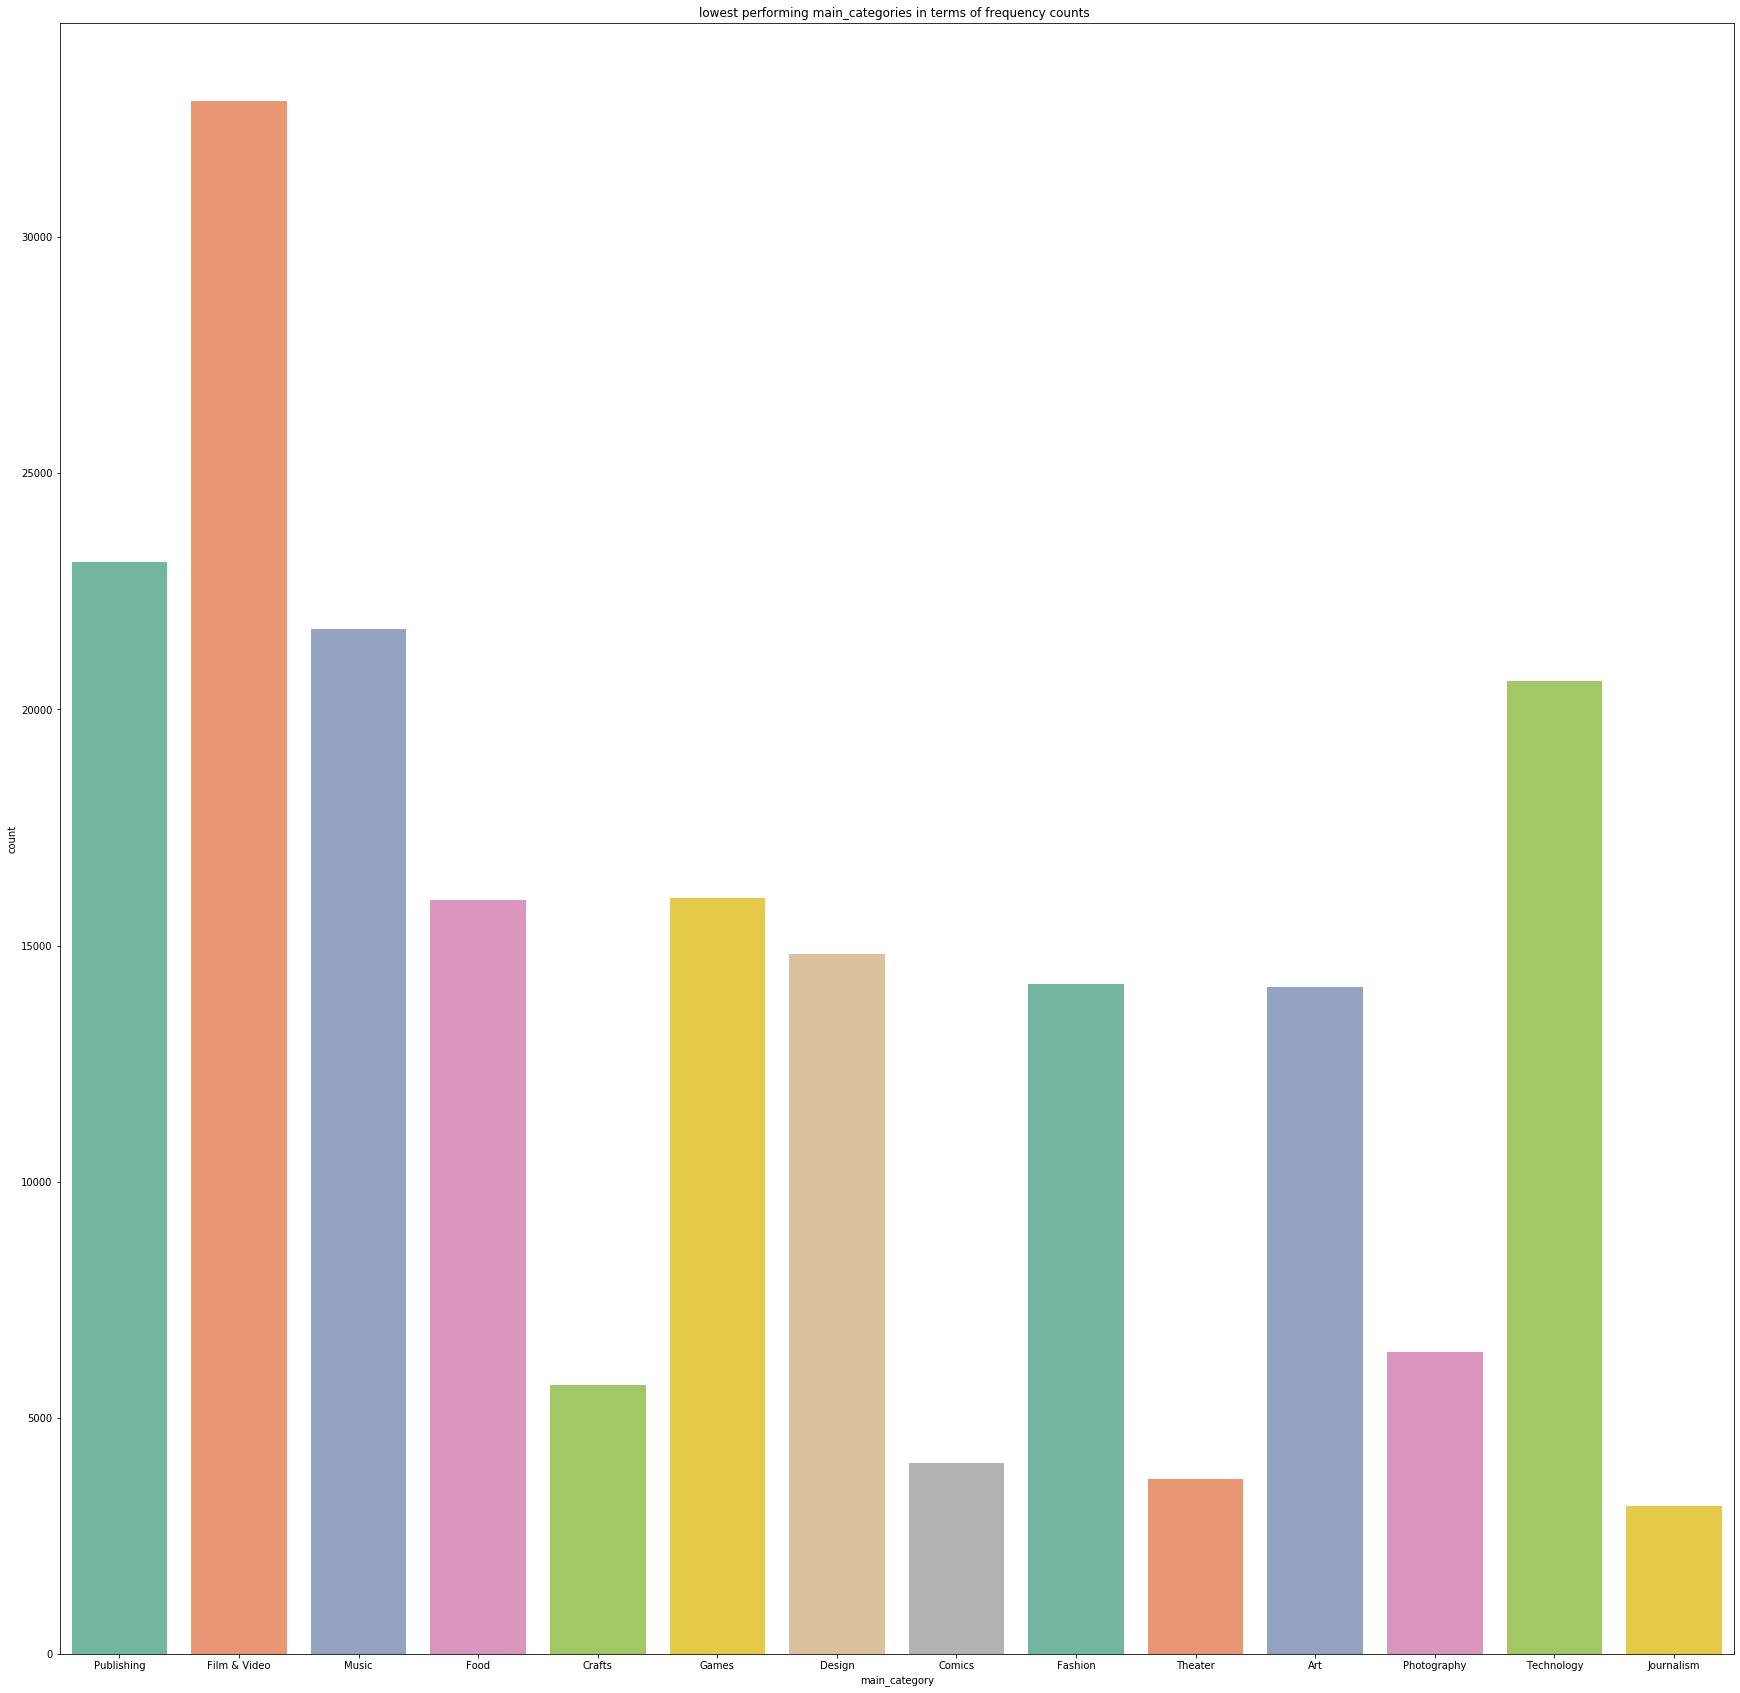

In [12]:
shape = (30, 30)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='main_category', palette="Set2",data= kick[kick['state'] == 'failed'].groupby("main_category").filter(lambda x: len(x) > 2500),
               ax=ax)
plt.title('lowest performing main_categories in terms of frequency counts ');

Moving on to the highest number of failed projects in a main_category turns out to be Film&video followed by publishing and Music.

The next step is to calculate the success rates of these main categories.

In [13]:
counts = kick.main_category.value_counts()
succ = kick[kick.state == 'successful'].main_category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['main_category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
most_success = frame.sort_values('Percent').tail(10)
least_success = frame.sort_values('Percent').head(10)

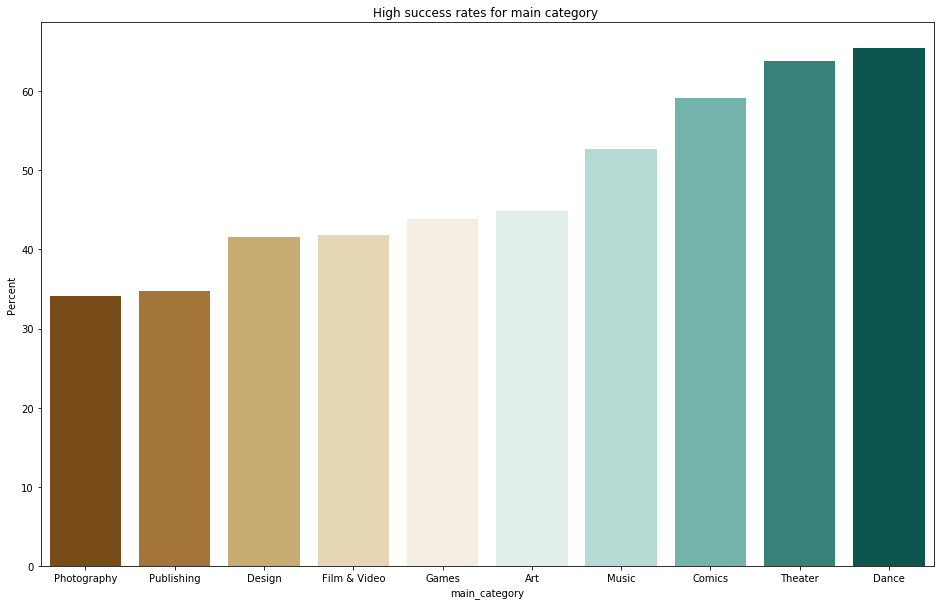

In [14]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='main_category',y = 'Percent', palette="BrBG",data = most_success, ax=ax)
plt.title('High success rates for main category ');

As evident by the plot above, the most success rates for a main category is Dance followed by theatre and comics.

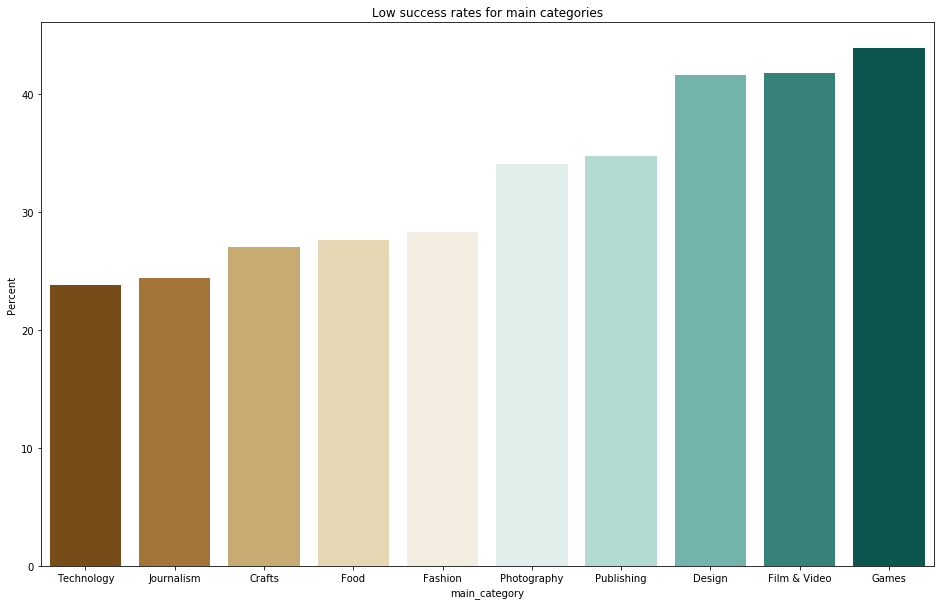

In [15]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.barplot(x='main_category',y = 'Percent', palette="BrBG",data = least_success, ax=ax)
plt.title('Low success rates for main categories');

And lastly, as evidenced by the plot above, the least successful main category is Technology followed by journalism and crafts.

### What main_categories have the most amount of money pledged amongst successful and failed projects and the least amount of money pledged? This gives us an insight into what each different main category goal amount is needed to realise its goals and kickstart the project

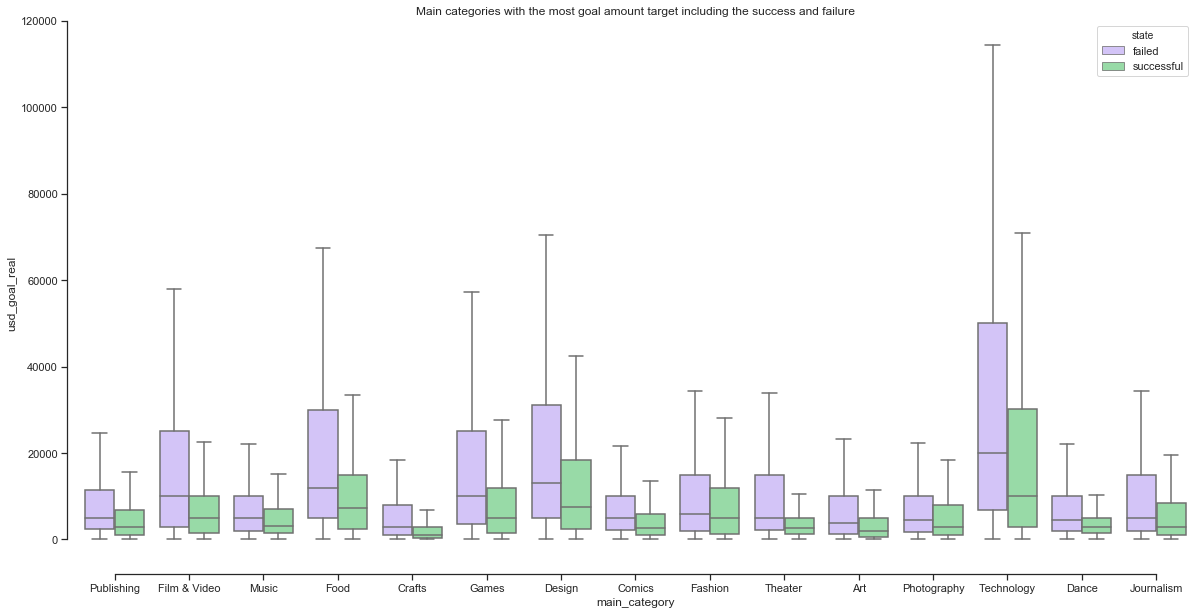

In [16]:
plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="main_category", y="usd_goal_real",
            hue="state", palette=["m", "g"],
            data=kick, showfliers = False)
sns.despine(offset=10, trim=True)
plt.title('Main categories with the most goal amount target including the success and failure');

Judging by the measures of centrality in the box plot above, technology requires the most amount in pledged and the least amount needed for a main category is crafts. Seeing as the last question has indicated that technology main category has the least success rates and in terms of the money required to kickstart the project, it migh not be the most viable domian for our angel investors. 

### For the successful and failed projects in our respective main_categories, which categories see more money than was originally pledged?

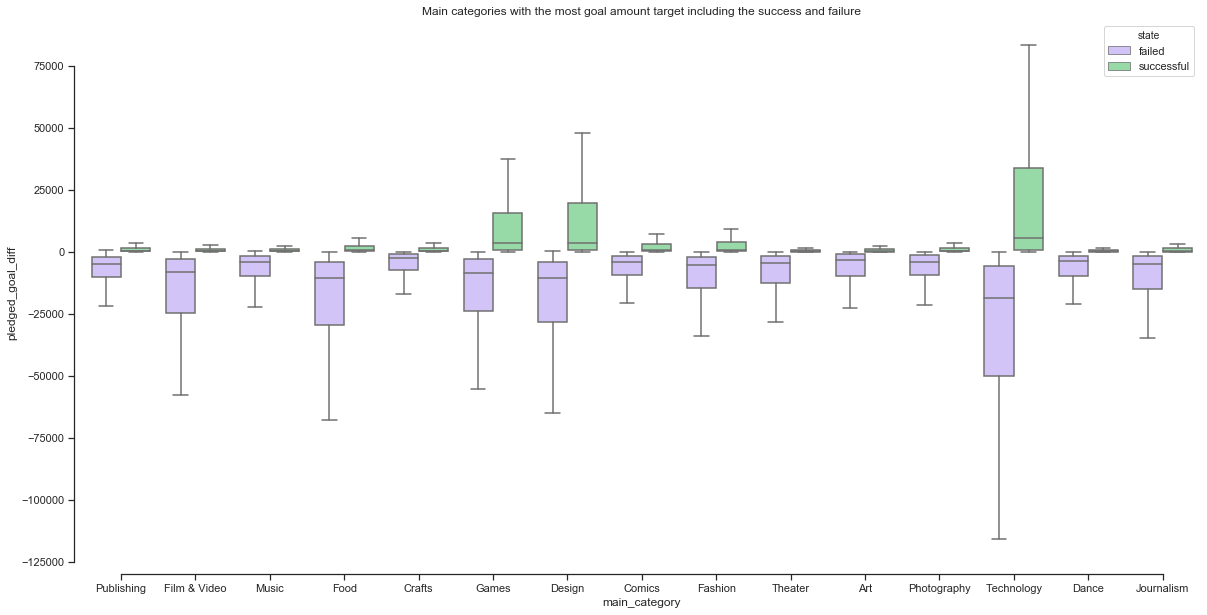

In [17]:
plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="main_category", y="pledged_goal_diff",
            hue="state", palette=["m", "g"],
            data=kick, showfliers = False)
sns.despine(offset=10, trim=True)
plt.title('Main categories with the most goal amount target including the success and failure');

Judging from the plot above, even though technology main_category has least success rates in a project kickstarting, some of the successful projects end up having more money for their target goal than any other category followed by design and games main category.

### The next question our client asked- what is the deadline bench mark for most successful projects on kickstarter? and what duration of days does have a lower cahnce of a project being successful?

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


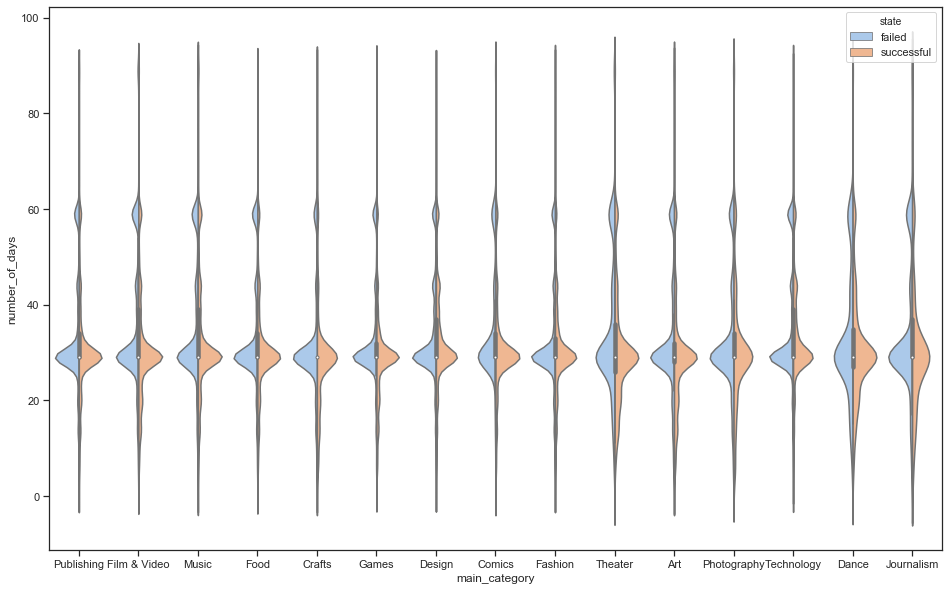

In [18]:
shape = (16, 10)
fig, ax = plt.subplots(figsize = shape)
sns.violinplot(x="main_category", y="number_of_days", hue= 'state', data=kick, split=True)

Judging from the plot above, we can see that the mean of both distributions for the failed and successful main_categories is around 30 days and between 40 and 60 days there is a higher chance of your kickstarter project ending up unsuccessful rather than successful.

### Our client would like to know the most popular words in the failed and successful projects.

In [19]:

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

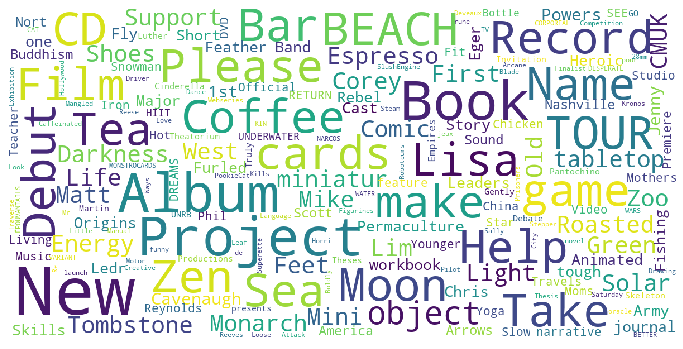

In [20]:
show_wordcloud(kick[kick.state == 'successful']['name'])

It is evident from the word cloud that the buzz words for successful projects are ZEN, CD, NEW, RECORD, ALBUM

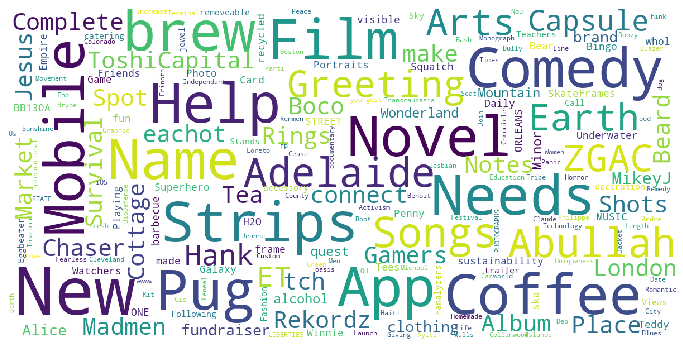

In [21]:
show_wordcloud(kick[kick.state == 'failed']['name'])

The buzzwords for failed projects is BREW, COMEDY, NOVEL, NEW , MOBILE

In [22]:
import pandas as pd
import models as md

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import eli5
from eli5.sklearn import PermutationImportance


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding 

##  Preprocessing stage

In [23]:
# kick=pd.read_csv('cleaned_data')

# kick['launched']=pd.to_datetime(kick['launched'])
# kick['deadline']=pd.to_datetime(kick['deadline'])

# kick_sampled=kick.sample(n=50000, random_state=1)

# col=['category','main_category', 'currency', 'country']
# kick_cat=kick_sampled[col]
# kick_dummy = pd.get_dummies(kick_cat, drop_first=True)
# kick_sampled=kick_sampled.drop(columns=col, axis=1)
# final_df_kick=pd.concat([kick_sampled,kick_dummy], axis=1)
# final_df_kick.info()

# final_df_kick.to_csv('kickstarters_with_dummy_sampled.csv', index=False)

In [24]:
final_dummy_kick = pd.read_csv('kickstarters_with_dummy_sampled.csv')


In [25]:
final_dummy_kick['classes_state'].value_counts()

0    29861
1    20139
Name: classes_state, dtype: int64

In [26]:
y = final_dummy_kick['classes_state']
X = final_dummy_kick.drop(columns=['classes_state','name','state','launched', 'deadline','ID','backers','usd_pledged_real','pledged_goal_diff'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 207 entries, usd_goal_real to country_US
dtypes: float64(1), int64(206)
memory usage: 79.0 MB


In [27]:
X_train, X_test, y_train, y_test = md.preprocessing(X,y)

## Models

### Logistic Regression Model 

#### Baseline model

In [28]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
fpr, tpr, thresholds, fpr1, tpr1, thresholds1 = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, logreg)

Train Accuracy Score: 0.6444571428571428 
 Test Accuracy Score: 0.6298666666666667 
 AUC train: 0.7081852626194063 
AUC test: 0.694076259905354 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      8947
           1       0.53      0.66      0.59      6053

    accuracy                           0.63     15000
   macro avg       0.63      0.63      0.63     15000
weighted avg       0.65      0.63      0.63     15000
 
 Predicted     0     1    All
True                        
0          5447  3500   8947
1          2052  4001   6053
All        7499  7501  15000


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


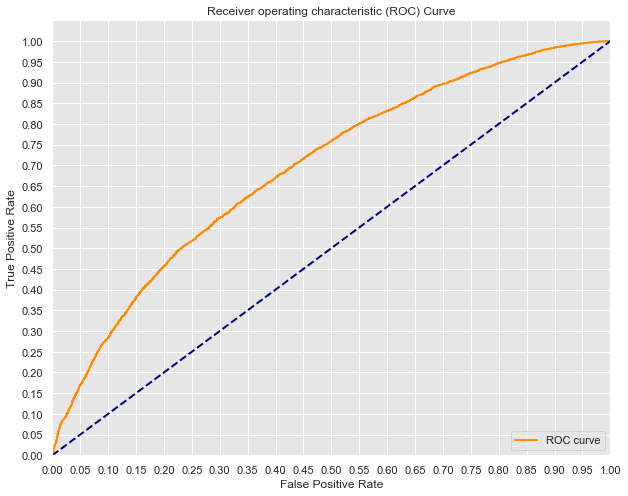

In [29]:
md.plot_roc_curve(fpr,tpr)

#### Class Imbalance Logistic Regression Model 

In [30]:
print('Raw counts: \n')
print(final_dummy_kick['classes_state'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(final_dummy_kick['classes_state'].value_counts(normalize=True))

Raw counts: 

0    29861
1    20139
Name: classes_state, dtype: int64
-----------------------------------
Normalized counts: 

0    0.59722
1    0.40278
Name: classes_state, dtype: float64


Approximately 60/40% split between target variable classes.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.6444571428571428 
 Test Accuracy Score: 0.6298666666666667 
 AUC train: 0.7081852592249109 
AUC test: 0.6940762783704637 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      8947
           1       0.53      0.66      0.59      6053

    accuracy                           0.63     15000
   macro avg       0.63      0.63      0.63     15000
weighted avg       0.65      0.63      0.63     15000
 
 Predicted     0     1    All
True                        
0          5447  3500   8947
1          2052  4001   6053
All        7499  7501  15000
None


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.6362285714285715 
 Test Accuracy Score: 0.6206666666666667 
 AUC train: 0.7157046773334653 
AUC test: 0.700718455254728 
               precision    recall  f1-score   support

           0       0.75      0.55      0.63      8947
           1       0.52      0.73      0.61      6053

    accuracy                           0.62     15000
   macro avg       0.63      0.64      0.62     15000
weighted avg       0.66      0.62      0.62     15000
 
 Predicted     0     1    All
True                        
0          4916  4031   8947
1          1659  4394   6053
All        6575  8425  15000
Balanced


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.6354857142857143 
 Test Accuracy Score: 0.6210666666666667 
 AUC train: 0.7158402704484024 
AUC test: 0.700736994224723 
               precision    recall  f1-score   support

           0       0.75      0.55      0.63      8947
           1       0.52      0.73      0.61      6053

    accuracy                           0.62     15000
   macro avg       0.64      0.64      0.62     15000
weighted avg       0.66      0.62      0.62     15000
 
 Predicted     0     1    All
True                        
0          4908  4039   8947
1          1645  4408   6053
All        6553  8447  15000
1.5 to 1


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.6144571428571428 
 Test Accuracy Score: 0.6025333333333334 
 AUC train: 0.7202180186572597 
AUC test: 0.7049521355739365 
               precision    recall  f1-score   support

           0       0.77      0.47      0.59      8947
           1       0.50      0.79      0.62      6053

    accuracy                           0.60     15000
   macro avg       0.64      0.63      0.60     15000
weighted avg       0.66      0.60      0.60     15000
 
 Predicted     0     1    All
True                        
0          4245  4702   8947
1          1260  4793   6053
All        5505  9495  15000
2 to 1


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.5093428571428571 
 Test Accuracy Score: 0.5055333333333333 
 AUC train: 0.7121111661637903 
AUC test: 0.7003751519378458 
               precision    recall  f1-score   support

           0       0.87      0.20      0.33      8947
           1       0.45      0.96      0.61      6053

    accuracy                           0.51     15000
   macro avg       0.66      0.58      0.47     15000
weighted avg       0.70      0.51      0.44     15000
 
 Predicted     0      1    All
True                         
0          1796   7151   8947
1           266   5787   6053
All        2062  12938  15000
10 to 1


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.4869142857142857 
 Test Accuracy Score: 0.4866 
 AUC train: 0.6684920254004381 
AUC test: 0.6583284171517898 
               precision    recall  f1-score   support

           0       0.89      0.16      0.27      8947
           1       0.44      0.97      0.60      6053

    accuracy                           0.49     15000
   macro avg       0.67      0.57      0.44     15000
weighted avg       0.71      0.49      0.40     15000
 
 Predicted     0      1    All
True                         
0          1413   7534   8947
1           167   5886   6053
All        1580  13420  15000
100 to 1


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy Score: 0.47574285714285713 
 Test Accuracy Score: 0.4756 
 AUC train: 0.6517366760729942 
AUC test: 0.6423545740135232 
               precision    recall  f1-score   support

           0       0.90      0.14      0.24      8947
           1       0.43      0.98      0.60      6053

    accuracy                           0.48     15000
   macro avg       0.66      0.56      0.42     15000
weighted avg       0.71      0.48      0.38     15000
 
 Predicted     0      1    All
True                         
0          1223   7724   8947
1           142   5911   6053
All        1365  13635  15000
1000 to 1


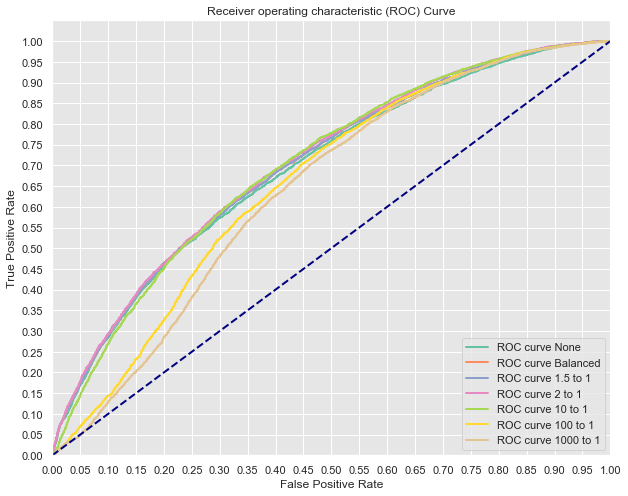

In [31]:
weights = [None, 'balanced', {1:1.5, 0:1}, {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '1.5 to 1','2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Using fit_pred_accuracy function to fit, predict, and get the accuracy of the model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    fpr, tpr, thresholds, fpr1, tpr1, thresholds1 = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, logreg)
    print(names[n])
    plt.plot(fpr, tpr, color=colors[n],
             lw=2, label='ROC curve {}'.format(names[n]))
     
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As evidenced, class weight can have a significant impact! In this case, typically the heavier we weigh the positive case, the better our classifier appears to be performing until it is weighed more than 2 to 1, which is also generalisable and then perfomance drops again becasue our dataset is not that Imbalanced to begin with.

The optimal value for the AUC is 0.712.

Because of the scope of this project and the amount of data points that we have K-Nearest neighbors is not the best classification algorithm to use in this instance to get a good model.

### Decision Tree Model

#### Baseline model

In [32]:
model_dt1 = DecisionTreeClassifier(criterion='entropy')
fpr_dt, tpr_dt, thresholds_dt, fpr1_dt, tpr1_dt, thresholds1_dt = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, model_dt1)

Train Accuracy Score: 0.9084571428571429 
 Test Accuracy Score: 0.6188 
 AUC train: 0.9794093835472968 
AUC test: 0.6045422396859483 
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      8947
           1       0.53      0.47      0.50      6053

    accuracy                           0.62     15000
   macro avg       0.60      0.59      0.60     15000
weighted avg       0.61      0.62      0.61     15000
 
 Predicted     0     1    All
True                        
0          6450  2497   8947
1          3221  2832   6053
All        9671  5329  15000


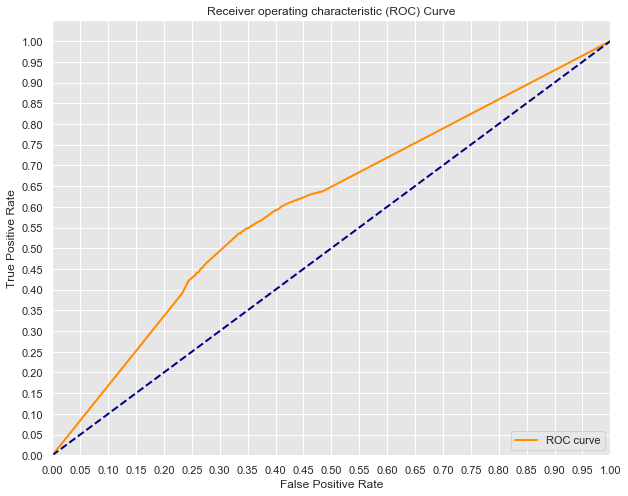

In [33]:
md.plot_roc_curve(fpr_dt,tpr_dt)

In [34]:
# md.graph_tree_plot(model_dt1, X_train)

Considering AUC score for test and for train data our baseline model is overfitted. The confusion matrix also details that the model was able to predict 44215 True Negatives, 15178 false positives, 21003 False negatives and 18949 True Positives.

Next up, we are going to regrow the tree using the criterion= Gini and random_state = 20 and access the performance.

In [35]:
model_dt2 = DecisionTreeClassifier(criterion='gini', random_state = 20)
fpr2_dt, tpr2_dt, thresholds2_dt, fpr02_dt, tpr02_dt, thresholds02_dt = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, model_dt2)

Train Accuracy Score: 0.9084571428571429 
 Test Accuracy Score: 0.6175333333333334 
 AUC train: 0.9794093835472968 
AUC test: 0.6022680306301453 
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      8947
           1       0.53      0.47      0.50      6053

    accuracy                           0.62     15000
   macro avg       0.60      0.59      0.59     15000
weighted avg       0.61      0.62      0.61     15000
 
 Predicted     0     1    All
True                        
0          6417  2530   8947
1          3207  2846   6053
All        9624  5376  15000


Between the Gini and entropy, the accuracy is 61.75% for gini and 62.00% for entropy. Although the model predicts True Negatives better by 96 instances and the true instances are less by 50 instances AUC is still the same.

Performing some hyperparamter tuning on the Decision tree model with maximum depth tuning.

In [36]:
model_dt3 = DecisionTreeClassifier(criterion='gini',random_state = 20, max_depth = 5)
fpr3_dt, tpr3_dt, thresholds3_dt, fpr03_dt, tpr03_dt, thresholds03_dt = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, model_dt3)

Train Accuracy Score: 0.6515142857142857 
 Test Accuracy Score: 0.6418 
 AUC train: 0.6624954050414311 
AUC test: 0.6544410684274306 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73      8947
           1       0.58      0.39      0.47      6053

    accuracy                           0.64     15000
   macro avg       0.62      0.60      0.60     15000
weighted avg       0.63      0.64      0.62     15000
 
 Predicted      0     1    All
True                         
0           7269  1678   8947
1           3695  2358   6053
All        10964  4036  15000


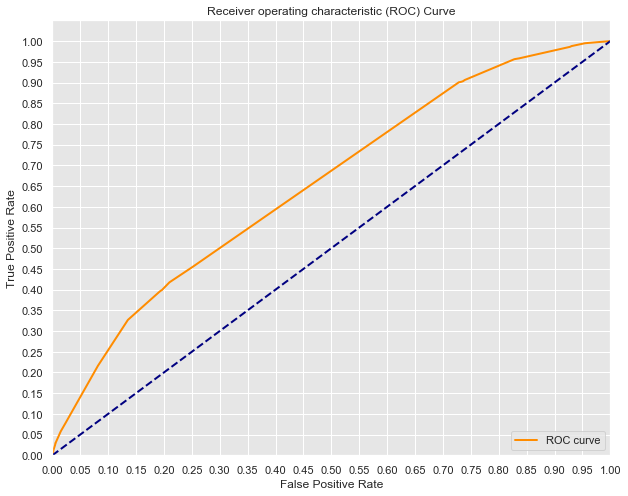

In [37]:
md.plot_roc_curve(fpr3_dt,tpr3_dt)

AUC for test data is better when the max_depth is set to 5 and the error between the model is less and therefore regularisation technique worked as it is not overfitting.

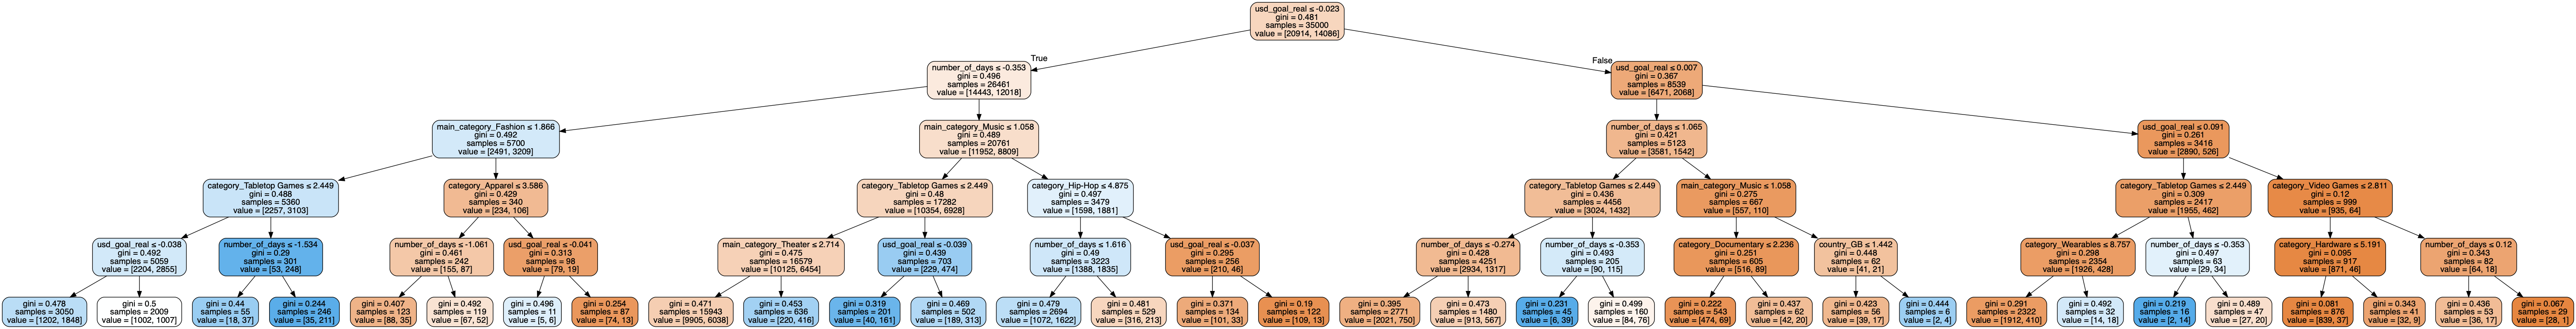

In [38]:
md.graph_tree_plot(model_dt3, X_train)

Reducing the max_depth allows us to plot the decsison tree and we can see from the top at the root node tha the most impportant feature the model split on was usd_goal_real. Although the gini is not optimised beacuse of the regularisation technique of reducing the max_depth, the best gini scores were prerdicting class 0 better than class 1 which classifying unsuccessful projects than successful projects.

#### The best parameters for Decision Tree Model using GridSearchCV

Let's optimise the model for the best hyperparamters for Max depth and min samples in each leaf node using GridSearchCV.

In [39]:
model = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,15+1),'min_samples_leaf':[50, 100, 200, 300]}
fpr_cv, tpr_cv, thresholds_cv=md.best_parameters_finder(X_train, X_test, y_train, y_test, model, param_grid, cv=3, 
                                                  scoring='roc_auc')

Train Accuracy Score: 0.6786285714285715 
 Test Accuracy Score: 0.658 
 AUC: 0.7030302500410341 
 {'max_depth': 14, 'min_samples_leaf': 50} 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74      8947
           1       0.61      0.43      0.50      6053

    accuracy                           0.66     15000
   macro avg       0.64      0.62      0.62     15000
weighted avg       0.65      0.66      0.64     15000
 
 Predicted      0     1    All
True                         
0           7268  1679   8947
1           3451  2602   6053
All        10719  4281  15000


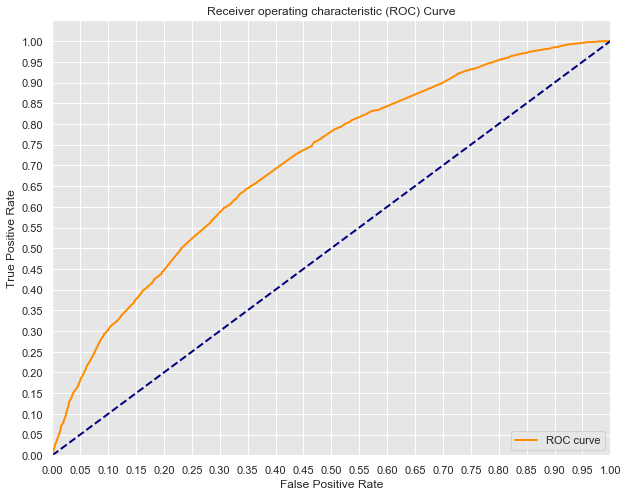

In [40]:
md.plot_roc_curve(fpr_cv,tpr_cv)

### Ensemble methods

#### Bagged Trees Model

Our first ensemble will be Bagged Tree Model for which we will use 20 decision trees.

In [41]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=11), n_estimators=20)
fpr_bt, tpr_bt, thresholds_bt, fpr1_bt, tpr1_bt, thresholds1_bt = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, model_dt3)

Train Accuracy Score: 0.6515142857142857 
 Test Accuracy Score: 0.6418 
 AUC train: 0.6624954050414311 
AUC test: 0.6544410684274306 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73      8947
           1       0.58      0.39      0.47      6053

    accuracy                           0.64     15000
   macro avg       0.62      0.60      0.60     15000
weighted avg       0.63      0.64      0.62     15000
 
 Predicted      0     1    All
True                         
0           7269  1678   8947
1           3695  2358   6053
All        10964  4036  15000


After using the important features contributing to the model the AUC is still relatively the same compared to the other classifiers.

#### Random Forest Model

In [42]:
model_rf = RandomForestClassifier(n_estimators=700, max_depth=50, n_jobs=700, min_samples_leaf=25)
fpr_rf, tpr_rf, thresholds_rf, fpr1_rf, tpr1_rf, thresholds1_rf = md.fit_pred_accuracy(X_train, X_test, y_train, y_test, model_rf)

Train Accuracy Score: 0.6793428571428571 
 Test Accuracy Score: 0.6706666666666666 
 AUC train: 0.7338041059299241 
AUC test: 0.7157131397959653 
               precision    recall  f1-score   support

           0       0.68      0.85      0.75      8947
           1       0.65      0.41      0.50      6053

    accuracy                           0.67     15000
   macro avg       0.66      0.63      0.63     15000
weighted avg       0.67      0.67      0.65     15000
 
 Predicted      0     1    All
True                         
0           7589  1358   8947
1           3582  2471   6053
All        11171  3829  15000


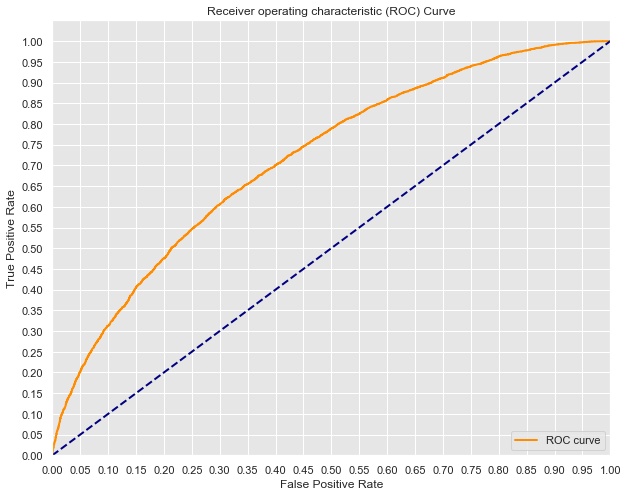

In [43]:
md.plot_roc_curve(fpr_rf,tpr_rf)


#### The best parameters for Random Forest Model using GridSearchCV

In [44]:
model_rf2 = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 11],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6, 10]
}

fpr_cv1, tpr_cv1, thresholds_cv1 = md.best_parameters_finder(X_train, X_test, y_train, y_test,
                                                             model_rf2, rf_param_grid, cv=3, 
                                                             scoring='roc_auc')
                       

Train Accuracy Score: 0.7123428571428572 
 Test Accuracy Score: 0.6742666666666667 
 AUC: 0.7231017595015129 
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100} 
               precision    recall  f1-score   support

           0       0.69      0.83      0.75      8947
           1       0.64      0.45      0.53      6053

    accuracy                           0.67     15000
   macro avg       0.66      0.64      0.64     15000
weighted avg       0.67      0.67      0.66     15000
 
 Predicted      0     1    All
True                         
0           7386  1561   8947
1           3325  2728   6053
All        10711  4289  15000


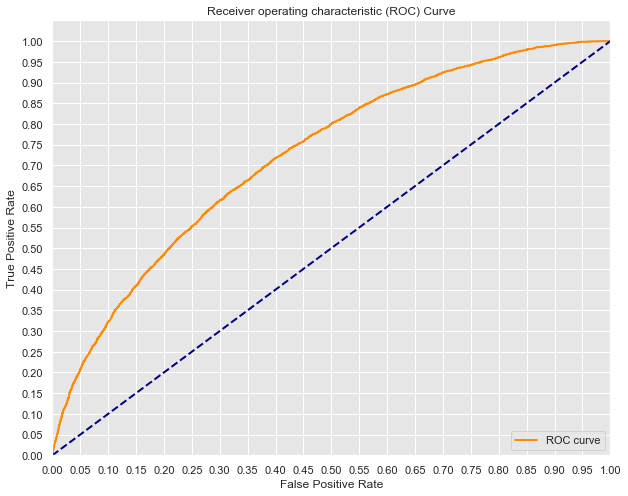

In [45]:
md.plot_roc_curve(fpr_cv1,tpr_cv1)

##### Finding the optimal threshold for the best model.

Concerning our best model which is the Random Forest Model with optimal grid seachcv, finding the threshold for our business case (penalising the False positive with respect to the false negative on the ratio 2 to 1.) We calculate the optimal threshold for this case.

In [46]:
md.optimal_threshold(fpr_cv1, tpr_cv1, thresholds_cv1)


0.6415467885807397

Optimal threshold is 0.

#### PCA

In [47]:
ss = StandardScaler()
scaled = ss.fit_transform(X)
from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(scaled)
pca

array([[-1.11625600e+00, -1.02667880e-01, -1.29885299e+00, ...,
        -2.26422390e-16, -6.66088541e-17,  1.69506445e-17],
       [ 4.35779214e+00,  4.26492817e+00,  3.40578387e-02, ...,
         3.68955380e-16,  2.84594859e-16,  7.03973592e-16],
       [-1.15795409e+00, -1.73396513e+00,  1.43991596e+00, ...,
         5.99561031e-16, -4.10908749e-16, -2.42075087e-16],
       ...,
       [-1.11173137e+00, -1.07871558e-01, -1.30396308e+00, ...,
        -1.13455851e-17, -2.56888922e-17, -1.07899028e-17],
       [ 3.49644073e+00,  8.62425144e-01, -2.00558195e+00, ...,
         2.84857578e-16, -1.46080783e-16,  2.68802561e-17],
       [-1.20959992e+00, -1.58644088e+00,  1.43844479e+00, ...,
         1.25197603e-17, -4.55807144e-17, -3.16225046e-17]])

Text(0, 0.5, 'Variance Explained')

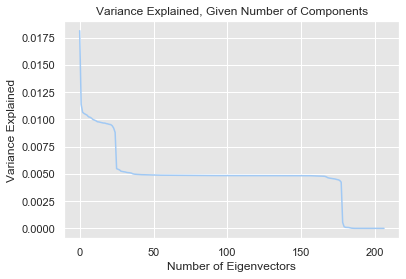

In [48]:
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [49]:
print(fit.explained_variance_ratio_)
print("--------------------")
print(fit.explained_variance_ratio_[:150].sum())
print("--------------------")
print("If we use ALL the data we can explain",fit.explained_variance_ratio_[:205].sum()*100," % of our data!")

[1.81360336e-02 1.13811003e-02 1.06522504e-02 1.05382785e-02
 1.04674326e-02 1.03858385e-02 1.02306651e-02 1.01982397e-02
 1.01104406e-02 9.98872912e-03 9.93021175e-03 9.87323939e-03
 9.78198993e-03 9.76417446e-03 9.72669394e-03 9.69739506e-03
 9.66509837e-03 9.65985058e-03 9.61450074e-03 9.58721168e-03
 9.54487309e-03 9.51973890e-03 9.42061413e-03 9.20158530e-03
 8.80548941e-03 5.47874967e-03 5.41419417e-03 5.35954606e-03
 5.24138731e-03 5.21098232e-03 5.18907527e-03 5.16795714e-03
 5.12915468e-03 5.11394126e-03 5.09809353e-03 5.06967786e-03
 5.00611585e-03 4.97572480e-03 4.96785029e-03 4.95144009e-03
 4.93988116e-03 4.92586213e-03 4.92524724e-03 4.92339045e-03
 4.91996950e-03 4.91699485e-03 4.91473107e-03 4.90971806e-03
 4.90451155e-03 4.89981434e-03 4.89834640e-03 4.89590941e-03
 4.88740547e-03 4.88421967e-03 4.88415887e-03 4.88046428e-03
 4.87924214e-03 4.87691179e-03 4.87389527e-03 4.87328308e-03
 4.87208668e-03 4.87005522e-03 4.86904276e-03 4.86837027e-03
 4.86686948e-03 4.865249